In [1]:
# TODO:找师兄对一下数据，保证只有pupil,eyelid中除了mean和no_outlier_mean都是未标准化过的

import numpy as np
import pandas as pd
from xgboost import XGBClassifier,XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
import matplotlib.pyplot as plt

In [2]:
column = ['r_13_count','r_13_mean','r_13_max','r_13_sum',
                             'r_12_count','r_12_mean','r_12_max','r_12_sum',
                             'r_23_count','r_23_mean','r_23_max','r_23_sum',
                             
                             'lr_13_count','lr_13_mean','lr_13_max','lr_13_sum',
                             'lr_12_count','lr_12_mean','lr_12_max','lr_12_sum',
                             'lr_23_count','lr_23_mean','lr_23_max','lr_23_sum',

                             'f_13_count','f_13_mean','f_13_max','f_13_sum',
                             'f_12_count','f_12_mean','f_12_max','f_12_sum',
                             'f_23_count','f_23_mean','f_23_max','f_23_sum',

                             'blink_13_count','blink_13_mean','blink_13_max','blink_13_sum',
                             'blink_12_count','blink_12_mean','blink_12_max','blink_12_sum',
                             'blink_23_count','blink_23_mean','blink_23_max','blink_23_sum',

                             'sacad_13_count','sacad_13_mean','sacad_13_max','sacad_13_sum',
                             'sacad_12_count','sacad_12_mean','sacad_12_max','sacad_12_sum',
                             'sacad_23_count','sacad_23_mean','sacad_23_max','sacad_23_sum',

                             'fixtn_13_count','fixtn_13_mean','fixtn_13_max','fixtn_13_sum',
                             'fixtn_12_count','fixtn_12_mean','fixtn_12_max','fixtn_12_sum',
                             'fixtn_23_count','fixtn_23_mean','fixtn_23_max','fixtn_23_sum',

                             'pupild_13_corr','pupild_13_iqr','pupild_13_nmean','pupild_13_nvar','pupild_13_range',
                             'pupild_12_corr','pupild_12_iqr','pupild_12_nmean','pupild_12_nvar','pupild_12_range',
                             'pupild_23_corr','pupild_23_iqr','pupild_23_nmean','pupild_23_nvar','pupild_23_range',

                             'eyeopn_13_corr','eyeopn_13_iqr','eyeopn_13_nmean','eyeopn_13_nvar','eyeopn_13_range',
                             'eyeopn_12_corr','eyeopn_12_iqr','eyeopn_12_nmean','eyeopn_12_nvar','eyeopn_12_range',
                             'eyeopn_23_corr','eyeopn_23_iqr','eyeopn_23_nmean','eyeopn_23_nvar','eyeopn_23_range',
                             

                             ]

tmp = column[:]
tmp.append('result_q1')
data = pd.DataFrame(columns=tmp)

data

,r_13_count,r_13_mean,r_13_max,r_13_sum,r_12_count,r_12_mean,r_12_max,r_12_sum,r_23_count,r_23_mean,...,eyeopn_12_iqr,eyeopn_12_nmean,eyeopn_12_nvar,eyeopn_12_range,eyeopn_23_corr,eyeopn_23_iqr,eyeopn_23_nmean,eyeopn_23_nvar,eyeopn_23_range,result_q1


# Rearview

In [3]:
excel = pd.ExcelFile('./Gaze Objects/RearView/t1~t3/Gaze Count(t1~t3 Rear View).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['r_13_count'] = combined_all

excel = pd.ExcelFile('./Gaze Objects/RearView/t1~t3/Gaze Duration_mean(t1~t3 Rear View).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['r_13_mean'] = combined_all

excel = pd.ExcelFile('./Gaze Objects/RearView/t1~t3/Gaze Duration_max(t1~t3 Rear View).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['r_13_max'] = combined_all

excel = pd.ExcelFile('./Gaze Objects/RearView/t1~t3/Gaze Duration_sum(t1~t3 Rear View).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['r_13_sum'] = combined_all


In [4]:
excel = pd.ExcelFile('./Gaze Objects/RearView/t1~t2/Gaze Count(t1~t2 Rear View).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['r_12_count'] = combined_all

excel = pd.ExcelFile('./Gaze Objects/RearView/t1~t2/Gaze Duration_mean(t1~t2 Rear View).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['r_12_mean'] = combined_all

excel = pd.ExcelFile('./Gaze Objects/RearView/t1~t2/Gaze Duration_max(t1~t2 Rear View).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['r_12_max'] = combined_all

excel = pd.ExcelFile('./Gaze Objects/RearView/t1~t2/Gaze Duration_sum(t1~t2 Rear View).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['r_12_sum'] = combined_all

In [5]:
excel = pd.ExcelFile('./Gaze Objects/RearView/t2~t3/Gaze Count(t2~t3 Rear View).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['r_23_count'] = combined_all

excel = pd.ExcelFile('./Gaze Objects/RearView/t2~t3/Gaze Duration_mean(t2~t3 Rear View).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['r_23_mean'] = combined_all

excel = pd.ExcelFile('./Gaze Objects/RearView/t2~t3/Gaze Duration_max(t2~t3 Rear View).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['r_23_max'] = combined_all

excel = pd.ExcelFile('./Gaze Objects/RearView/t2~t3/Gaze Duration_sum(t2~t3 Rear View).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['r_23_sum'] = combined_all

# Left/Rightview 

In [6]:
excel = pd.ExcelFile('./Gaze Objects/LFRF/t1~t3/Gaze Count(t1~t3 LFRF).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['lr_13_count'] = combined_all

excel = pd.ExcelFile('./Gaze Objects/LFRF/t1~t3/Gaze Duration_mean(t1~t3 LFRF).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['lr_13_mean'] = combined_all

excel = pd.ExcelFile('./Gaze Objects/LFRF/t1~t3/Gaze Duration_max(t1~t3 LFRF).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['lr_13_max'] = combined_all

excel = pd.ExcelFile('./Gaze Objects/LFRF/t1~t3/Gaze Duration_sum(t1~t3 LFRF).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['lr_13_sum'] = combined_all

data[['lr_13_count','lr_13_mean','lr_13_max','lr_13_sum']]

,lr_13_count,lr_13_mean,lr_13_max,lr_13_sum
0,1.0,0.699039,-5.691610,34.351474
1,1.0,-1.700961,-9.691610,22.351474
2,0.0,-9.100961,-20.691610,-34.648526
3,0.0,-5.100961,-22.691610,-18.648526
4,1.0,2.499039,8.308390,43.351474
...,...,...,...,...
811,0.0,-4.585648,-6.638889,-3.444444
812,0.0,-5.585648,-3.638889,-6.444444
813,0.0,-8.918981,-3.638889,-16.444444
814,1.0,0.664352,0.361111,29.555556


In [7]:
excel = pd.ExcelFile('./Gaze Objects/LFRF/t1~t2/Gaze Count(t1~t2 LFRF).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['lr_12_count'] = combined_all

excel = pd.ExcelFile('./Gaze Objects/LFRF/t1~t2/Gaze Duration_mean(t1~t2 LFRF).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['lr_12_mean'] = combined_all

excel = pd.ExcelFile('./Gaze Objects/LFRF/t1~t2/Gaze Duration_max(t1~t2 LFRF).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['lr_12_max'] = combined_all

excel = pd.ExcelFile('./Gaze Objects/LFRF/t1~t2/Gaze Duration_sum(t1~t2 LFRF).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['lr_12_sum'] = combined_all

data[['lr_12_count','lr_12_mean','lr_12_max','lr_12_sum']]

,lr_12_count,lr_12_mean,lr_12_max,lr_12_sum
0,0.0,-6.869803,3.061224,-3.786848
1,-1.0,-3.203137,0.061224,-18.786848
2,0.0,-19.203137,-32.938776,-40.786848
3,-1.0,0.296863,-12.938776,-11.786848
4,0.0,1.463530,10.061224,21.213152
...,...,...,...,...
811,1.0,-5.394676,-5.625000,3.368056
812,0.0,-5.894676,-2.625000,-9.631944
813,0.0,-6.894676,-2.625000,-11.631944
814,1.0,1.271991,1.375000,23.368056


In [8]:
excel = pd.ExcelFile('./Gaze Objects/LFRF/t2~t3/Gaze Count(t2~t3 LFRF).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['lr_23_count'] = combined_all

excel = pd.ExcelFile('./Gaze Objects/LFRF/t2~t3/Gaze Duration_mean(t2~t3 LFRF).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['lr_23_mean'] = combined_all

excel = pd.ExcelFile('./Gaze Objects/LFRF/t2~t3/Gaze Duration_max(t2~t3 LFRF).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['lr_23_max'] = combined_all

excel = pd.ExcelFile('./Gaze Objects/LFRF/t2~t3/Gaze Duration_sum(t2~t3 LFRF).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['lr_23_sum'] = combined_all

data[['lr_23_count','lr_23_mean','lr_23_max','lr_23_sum']]

,lr_23_count,lr_23_mean,lr_23_max,lr_23_sum
0,0.0,13.091837,11.902494,38.154195
1,1.0,0.425170,4.902494,41.154195
2,0.0,-2.408163,-7.097506,7.154195
3,0.0,-9.408163,-5.097506,-6.845805
4,0.0,5.091837,25.902494,22.154195
...,...,...,...,...
811,-1.0,-4.636574,-5.354167,-6.090278
812,1.0,0.863426,4.645833,4.909722
813,0.0,-2.636574,-3.354167,-4.090278
814,0.0,8.363426,7.645833,6.909722


# Frontview

In [9]:
excel = pd.ExcelFile('./Gaze Objects/F/t1~t3/Gaze Count(t1~t3 F).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['f_13_count'] = combined_all

excel = pd.ExcelFile('./Gaze Objects/F/t1~t3/Gaze Duration_mean(t1~t3 F).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['f_13_mean'] = combined_all

excel = pd.ExcelFile('./Gaze Objects/F/t1~t3/Gaze Duration_max(t1~t3 F).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['f_13_max'] = combined_all

excel = pd.ExcelFile('./Gaze Objects/F/t1~t3/Gaze Duration_sum(t1~t3 F).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['f_13_sum'] = combined_all

data[['f_13_count','f_13_mean','f_13_max','f_13_sum']]

,f_13_count,f_13_mean,f_13_max,f_13_sum
0,0.0,-14.691610,-20.020408,-28.147392
1,-1.0,-15.691610,-21.020408,-29.147392
2,-1.0,-15.691610,-21.020408,-29.147392
3,1.0,-3.191610,2.979592,-4.147392
4,1.0,-4.191610,0.979592,-6.147392
...,...,...,...,...
811,-1.0,21.966435,20.138889,16.263889
812,-2.0,-12.033565,-13.861111,-17.736111
813,0.0,-3.533565,-4.861111,-0.736111
814,-1.0,0.966435,-0.861111,-4.736111


In [10]:
excel = pd.ExcelFile('./Gaze Objects/F/t1~t2/Gaze Count(t1~t2 F).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['f_12_count'] = combined_all

excel = pd.ExcelFile('./Gaze Objects/F/t1~t2/Gaze Duration_mean(t1~t2 F).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['f_12_mean'] = combined_all

excel = pd.ExcelFile('./Gaze Objects/F/t1~t2/Gaze Duration_max(t1~t2 F).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['f_12_max'] = combined_all

excel = pd.ExcelFile('./Gaze Objects/F/t1~t2/Gaze Duration_sum(t1~t2 F).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['f_12_sum'] = combined_all

data[['f_12_count','f_12_mean','f_12_max','f_12_sum']]

,f_12_count,f_12_mean,f_12_max,f_12_sum
0,-1.0,-9.312169,-9.761905,-9.997732
1,-1.0,-9.312169,-9.761905,-9.997732
2,-1.0,-9.312169,-9.761905,-9.997732
3,0.0,14.687831,14.238095,14.002268
4,0.0,12.687831,12.238095,12.002268
...,...,...,...,...
811,0.0,-3.475694,-4.020833,-4.243056
812,0.0,-3.475694,-4.020833,-4.243056
813,1.0,5.524306,4.979167,4.756944
814,1.0,9.524306,8.979167,8.756944


In [11]:
excel = pd.ExcelFile('./Gaze Objects/F/t2~t3/Gaze Count(t2~t3 F).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['f_23_count'] = combined_all

excel = pd.ExcelFile('./Gaze Objects/F/t2~t3/Gaze Duration_mean(t2~t3 F).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['f_23_mean'] = combined_all

excel = pd.ExcelFile('./Gaze Objects/F/t2~t3/Gaze Duration_max(t2~t3 F).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['f_23_max'] = combined_all

excel = pd.ExcelFile('./Gaze Objects/F/t2~t3/Gaze Duration_sum(t2~t3 F).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['f_23_sum'] = combined_all

data[['f_23_count','f_23_mean','f_23_max','f_23_sum']]

,f_23_count,f_23_mean,f_23_max,f_23_sum
0,1.0,-10.209373,-13.623583,-15.986395
1,0.0,-11.209373,-14.623583,-16.986395
2,0.0,-11.209373,-14.623583,-16.986395
3,1.0,-10.209373,-13.623583,-15.986395
4,1.0,-10.209373,-13.623583,-15.986395
...,...,...,...,...
811,0.0,22.965278,21.875000,20.923611
812,-1.0,-11.034722,-12.125000,-13.076389
813,0.0,-3.034722,-4.125000,-5.076389
814,-1.0,-11.034722,-12.125000,-13.076389


# Blink

In [12]:
excel = pd.ExcelFile('./Blink/t1~t3/Blink Count(t1~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['blink_13_count'] = combined_all

excel = pd.ExcelFile('./Blink/t1~t3/Blink Duration_mean(t1~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['blink_13_mean'] = combined_all

excel = pd.ExcelFile('./Blink/t1~t3/Blink Duration_max(t1~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['blink_13_max'] = combined_all

excel = pd.ExcelFile('./Blink/t1~t3/Blink Duration_sum(t1~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['blink_13_sum'] = combined_all

data[['blink_13_count','blink_13_mean','blink_13_max','blink_13_sum']]

,blink_13_count,blink_13_mean,blink_13_max,blink_13_sum
0,0.0,-4.273469,-6.984127,-29.503401
1,2.0,2.976531,11.015873,32.496599
2,3.0,-6.173469,-4.984127,10.496599
3,0.0,-4.273469,-6.984127,-29.503401
4,-2.0,-20.773469,-23.984127,-62.503401
...,...,...,...,...
811,2.0,2.331316,7.020833,52.381944
812,-1.0,-2.668684,4.020833,-30.618056
813,1.0,0.664649,7.020833,21.381944
814,-2.0,1.164649,-3.979167,-40.618056


In [13]:
excel = pd.ExcelFile('./Blink/t1~t2/Blink Count(t1~t2).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['blink_12_count'] = combined_all

excel = pd.ExcelFile('./Blink/t1~t2/Blink Duration_mean(t1~t2).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['blink_12_mean'] = combined_all

excel = pd.ExcelFile('./Blink/t1~t2/Blink Duration_max(t1~t2).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['blink_12_max'] = combined_all

excel = pd.ExcelFile('./Blink/t1~t2/Blink Duration_sum(t1~t2).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['blink_12_sum'] = combined_all

data[['blink_12_count','blink_12_mean','blink_12_max','blink_12_sum']]

,blink_12_count,blink_12_mean,blink_12_max,blink_12_sum
0,0.0,0.806122,0.018141,-6.501134
1,1.0,2.806122,4.018141,14.498866
2,1.0,-2.193878,1.018141,4.498866
3,-1.0,-16.193878,-16.981859,-23.501134
4,-1.0,-16.193878,-16.981859,-23.501134
...,...,...,...,...
811,3.0,2.221065,2.694444,44.729167
812,0.0,3.221065,1.694444,-11.270833
813,0.0,-1.778935,-3.305556,-16.270833
814,0.0,4.221065,2.694444,-10.270833


In [14]:
excel = pd.ExcelFile('./Blink/t2~t3/Blink Count(t2~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['blink_23_count'] = combined_all

excel = pd.ExcelFile('./Blink/t2~t3/Blink Duration_mean(t2~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['blink_23_mean'] = combined_all

excel = pd.ExcelFile('./Blink/t2~t3/Blink Duration_max(t2~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['blink_23_max'] = combined_all

excel = pd.ExcelFile('./Blink/t2~t3/Blink Duration_sum(t2~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['blink_23_sum'] = combined_all

data[['blink_23_count','blink_23_mean','blink_23_max','blink_23_sum']]

,blink_23_count,blink_23_mean,blink_23_max,blink_23_sum
0,-1.0,-2.281557,-5.519274,-22.446712
1,1.0,1.051776,13.480726,19.553288
2,1.0,-3.281557,-2.519274,6.553288
3,0.0,-1.781557,-4.519274,-5.446712
4,-2.0,-18.281557,-21.519274,-38.446712
...,...,...,...,...
811,0.0,0.084491,8.166667,9.062500
812,-1.0,-3.748843,5.166667,-18.937500
813,1.0,2.251157,8.166667,38.062500
814,-2.0,1.751157,-2.833333,-29.937500


# Saccade

In [15]:
excel = pd.ExcelFile('./Saccade/t1~t3/Saccade Count(t1~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['sacad_13_count'] = combined_all

excel = pd.ExcelFile('./Saccade/t1~t3/Saccade Duration_mean(t1~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['sacad_13_mean'] = combined_all

excel = pd.ExcelFile('./Saccade/t1~t3/Saccade Duration_max(t1~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['sacad_13_max'] = combined_all

excel = pd.ExcelFile('./Saccade/t1~t3/Saccade Duration_sum(t1~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['sacad_13_sum'] = combined_all

data[['sacad_13_count','sacad_13_mean','sacad_13_max','sacad_13_sum']]

,sacad_13_count,sacad_13_mean,sacad_13_max,sacad_13_sum
0,-9.0,3.389929,-2.349206,-7.625850
1,-2.0,-1.681500,-7.349206,-38.625850
2,-12.0,4.695123,3.650794,-25.625850
3,-3.0,-1.245786,-5.349206,-35.625850
4,-8.0,3.804214,3.650794,9.374150
...,...,...,...,...
811,0.0,-0.509681,-5.215278,-20.826389
812,0.0,0.290319,-2.215278,-8.826389
813,2.0,-0.603799,-1.215278,-8.826389
814,1.0,3.877819,11.784722,56.173611


In [16]:
excel = pd.ExcelFile('./Saccade/t1~t2/Saccade Count(t1~t2).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['sacad_12_count'] = combined_all

excel = pd.ExcelFile('./Saccade/t1~t2/Saccade Duration_mean(t1~t2).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['sacad_12_mean'] = combined_all

excel = pd.ExcelFile('./Saccade/t1~t2/Saccade Duration_max(t1~t2).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['sacad_12_max'] = combined_all

excel = pd.ExcelFile('./Saccade/t1~t2/Saccade Duration_sum(t1~t2).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['sacad_12_sum'] = combined_all

data[['sacad_12_count','sacad_12_mean','sacad_12_max','sacad_12_sum']]

,sacad_12_count,sacad_12_mean,sacad_12_max,sacad_12_sum
0,-5.0,-0.105238,-4.210884,-15.580499
1,-4.0,-0.471905,-5.210884,-10.580499
2,-7.0,3.085238,-6.210884,-10.580499
3,-4.0,-0.171905,-3.210884,-7.580499
4,-4.0,1.928095,-4.210884,13.419501
...,...,...,...,...
811,3.0,-1.660599,-2.847222,-6.284722
812,2.0,0.383846,0.152778,5.715278
813,0.0,0.510830,1.152778,-10.284722
814,4.0,3.030311,1.152778,51.715278


In [17]:
excel = pd.ExcelFile('./Saccade/t2~t3/Saccade Count(t2~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['sacad_23_count'] = combined_all

excel = pd.ExcelFile('./Saccade/t2~t3/Saccade Duration_mean(t2~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['sacad_23_mean'] = combined_all

excel = pd.ExcelFile('./Saccade/t2~t3/Saccade Duration_max(t2~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['sacad_23_max'] = combined_all

excel = pd.ExcelFile('./Saccade/t2~t3/Saccade Duration_sum(t2~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['sacad_23_sum'] = combined_all

data[['sacad_23_count','sacad_23_mean','sacad_23_max','sacad_23_sum']]

,sacad_23_count,sacad_23_mean,sacad_23_max,sacad_23_sum
0,-7.0,8.525488,5.374150,7.646259
1,0.0,-2.907846,-11.625850,-27.353741
2,-7.0,4.125488,1.374150,-14.353741
3,-2.0,-2.374512,-7.625850,-28.353741
4,-7.0,6.125488,11.374150,-4.353741
...,...,...,...,...
811,-4.0,1.083774,-4.715278,-14.833333
812,-2.0,-0.944797,-2.715278,-13.833333
813,1.0,-1.116226,-1.715278,1.166667
814,-4.0,4.883774,14.284722,4.166667


# Fixation

In [18]:
excel = pd.ExcelFile('./Fixation/t1~t3/Fixation Count(t1~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['fixtn_13_count'] = combined_all

excel = pd.ExcelFile('./Fixation/t1~t3/Fixation Duration_mean(t1~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['fixtn_13_mean'] = combined_all

excel = pd.ExcelFile('./Fixation/t1~t3/Fixation Duration_max(t1~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['fixtn_13_max'] = combined_all

excel = pd.ExcelFile('./Fixation/t1~t3/Fixation Duration_sum(t1~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['fixtn_13_sum'] = combined_all

data[['fixtn_13_count','fixtn_13_mean','fixtn_13_max','fixtn_13_sum']]

,fixtn_13_count,fixtn_13_mean,fixtn_13_max,fixtn_13_sum
0,-5.0,5.592802,17.099773,23.369615
1,2.0,1.211850,5.099773,28.369615
2,-8.0,9.008387,17.099773,19.369615
3,1.0,2.085660,35.099773,36.369615
4,-5.0,1.235660,-5.900227,-37.630385
...,...,...,...,...
811,-2.0,1.717419,-7.937500,21.229167
812,-4.0,2.815633,-8.937500,8.229167
813,0.0,-0.303414,11.062500,13.229167
814,-2.0,-2.532581,-20.937500,-46.770833


In [19]:
excel = pd.ExcelFile('./Fixation/t1~t2/Fixation Count(t1~t2).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['fixtn_12_count'] = combined_all

excel = pd.ExcelFile('./Fixation/t1~t2/Fixation Duration_mean(t1~t2).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['fixtn_12_mean'] = combined_all

excel = pd.ExcelFile('./Fixation/t1~t2/Fixation Duration_max(t1~t2).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['fixtn_12_max'] = combined_all

excel = pd.ExcelFile('./Fixation/t1~t2/Fixation Duration_sum(t1~t2).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['fixtn_12_sum'] = combined_all

data[['fixtn_12_count','fixtn_12_mean','fixtn_12_max','fixtn_12_sum']]

,fixtn_12_count,fixtn_12_mean,fixtn_12_max,fixtn_12_sum
0,-4.0,4.471978,13.659864,28.782313
1,-4.0,1.027534,8.659864,-2.217687
2,-7.0,8.083089,20.659864,8.782313
3,-3.0,0.983089,-3.340136,7.782313
4,-3.0,-1.416911,-6.340136,-16.217687
...,...,...,...,...
811,3.0,-3.396686,-4.465278,5.534722
812,1.0,-1.760323,-2.465278,-2.465278
813,0.0,1.614677,0.534722,11.534722
814,3.0,-6.214868,-19.465278,-25.465278


In [20]:
excel = pd.ExcelFile('./Fixation/t2~t3/Fixation Count(t2~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['fixtn_23_count'] = combined_all

excel = pd.ExcelFile('./Fixation/t2~t3/Fixation Duration_mean(t2~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['fixtn_23_mean'] = combined_all

excel = pd.ExcelFile('./Fixation/t2~t3/Fixation Duration_max(t2~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['fixtn_23_max'] = combined_all

excel = pd.ExcelFile('./Fixation/t2~t3/Fixation Duration_sum(t2~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['fixtn_23_sum'] = combined_all

data[['fixtn_23_count','fixtn_23_mean','fixtn_23_max','fixtn_23_sum']]

,fixtn_23_count,fixtn_23_mean,fixtn_23_max,fixtn_23_sum
0,-7.0,4.153965,10.020408,-5.072562
1,-1.0,1.237298,-2.979592,29.927438
2,-8.0,9.487298,25.020408,9.927438
3,-2.0,1.941844,18.020408,28.927438
4,-8.0,3.287298,-0.979592,-21.072562
...,...,...,...,...
811,-3.0,6.008501,11.951389,15.986111
812,-4.0,8.241834,10.951389,9.986111
813,2.0,-3.067257,-8.048611,1.986111
814,-3.0,-0.158166,-16.048611,-21.013889


# Pupil Diameter (no outlier)

In [21]:
excel = pd.ExcelFile('./PupilDiameter/t1~t3/PupilDiameter_plot_period_corrcoef(t1~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['pupild_13_corr'] = combined_all

excel = pd.ExcelFile('./PupilDiameter/t1~t3/PupilDiameter_plot_period_IQR(t1~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['pupild_13_iqr'] = combined_all

excel = pd.ExcelFile('./PupilDiameter/t1~t3/PupilDiameter_plot_period_NoOutlier_mean(t1~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['pupild_13_nmean'] = combined_all

excel = pd.ExcelFile('./PupilDiameter/t1~t3/PupilDiameter_plot_period_NoOutlier_var(t1~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['pupild_13_nvar'] = combined_all

excel = pd.ExcelFile('./PupilDiameter/t1~t3/PupilDiameter_plot_period_Range(t1~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['pupild_13_range'] = combined_all

data[['pupild_13_corr','pupild_13_iqr','pupild_13_nmean','pupild_13_nvar','pupild_13_range']]

,pupild_13_corr,pupild_13_iqr,pupild_13_nmean,pupild_13_nvar,pupild_13_range
0,-0.032568,0.414596,0.182028,0.018045,1.219639
1,-0.245623,0.273173,0.216340,0.004741,1.088209
2,-0.171846,0.295184,0.215005,0.006305,0.726294
3,-0.675731,0.516740,0.000947,0.017890,1.021549
4,0.583702,0.199263,0.286352,0.001332,0.699501
...,...,...,...,...,...
811,0.160551,0.468011,0.422570,0.015846,1.150487
812,0.124123,0.547862,-0.626965,0.028338,1.335697
813,-0.034339,0.322523,0.172139,0.008033,1.099624
814,0.279747,0.302496,-0.049630,0.004758,1.638128


In [22]:
excel = pd.ExcelFile('./PupilDiameter/t1~t2/PupilDiameter_plot_period_corrcoef(t1~t2).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['pupild_12_corr'] = combined_all

excel = pd.ExcelFile('./PupilDiameter/t1~t2/PupilDiameter_plot_period_IQR(t1~t2).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['pupild_12_iqr'] = combined_all

excel = pd.ExcelFile('./PupilDiameter/t1~t2/PupilDiameter_plot_period_NoOutlier_mean(t1~t2).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['pupild_12_nmean'] = combined_all

excel = pd.ExcelFile('./PupilDiameter/t1~t2/PupilDiameter_plot_period_NoOutlier_var(t1~t2).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['pupild_12_nvar'] = combined_all

excel = pd.ExcelFile('./PupilDiameter/t1~t2/PupilDiameter_plot_period_Range(t1~t2).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['pupild_12_range'] = combined_all

data[['pupild_12_corr','pupild_12_iqr','pupild_12_nmean','pupild_12_nvar','pupild_12_range']]

,pupild_12_corr,pupild_12_iqr,pupild_12_nmean,pupild_12_nvar,pupild_12_range
0,0.383556,0.395731,0.143690,0.014768,0.561740
1,0.134803,0.301854,0.134082,0.008046,0.860306
2,-0.099736,0.286130,0.221007,0.005552,0.631245
3,-0.728843,0.626587,-0.016414,0.036442,1.010143
4,0.871335,0.289946,0.359989,0.006415,0.699501
...,...,...,...,...,...
811,-0.081072,0.223997,0.581014,0.004325,0.841121
812,0.091711,0.627358,-0.827718,0.035372,1.309518
813,-0.274833,0.265183,0.137137,0.006034,0.526531
814,0.220879,0.509070,-0.170415,0.016641,1.638128


In [23]:
excel = pd.ExcelFile('./PupilDiameter/t2~t3/PupilDiameter_plot_period_corrcoef(t2~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['pupild_23_corr'] = combined_all

excel = pd.ExcelFile('./PupilDiameter/t2~t3/PupilDiameter_plot_period_IQR(t2~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['pupild_23_iqr'] = combined_all

excel = pd.ExcelFile('./PupilDiameter/t2~t3/PupilDiameter_plot_period_NoOutlier_mean(t2~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['pupild_23_nmean'] = combined_all

excel = pd.ExcelFile('./PupilDiameter/t2~t3/PupilDiameter_plot_period_NoOutlier_var(t2~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['pupild_23_nvar'] = combined_all

excel = pd.ExcelFile('./PupilDiameter/t2~t3/PupilDiameter_plot_period_Range(t2~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['pupild_23_range'] = combined_all

data[['pupild_23_corr','pupild_23_iqr','pupild_23_nmean','pupild_23_nvar','pupild_23_range']]

,pupild_23_corr,pupild_23_iqr,pupild_23_nmean,pupild_23_nvar,pupild_23_range
0,-0.328146,0.482625,0.261359,0.018274,1.219639
1,-0.241196,0.146938,0.274974,0.000646,1.088209
2,-0.197448,0.330856,0.233345,0.009958,0.527732
3,-0.697650,0.263814,0.029382,0.004075,0.952589
4,-0.558826,0.144447,0.265348,0.001535,0.432957
...,...,...,...,...,...
811,0.158381,0.577406,0.229467,0.026681,0.898793
812,0.177270,0.317479,-0.426319,0.007197,1.249046
813,0.273980,0.362927,0.274433,0.013102,1.099624
814,0.415813,0.224504,0.051299,0.003101,0.579679


# Eyelid Opening

In [24]:
excel = pd.ExcelFile('./EyelidOpening/t1~t3/EyelidOpening_plot_period_corrcoef(t1~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['eyeopn_13_corr'] = combined_all

excel = pd.ExcelFile('./EyelidOpening/t1~t3/EyelidOpening_plot_period_IQR(t1~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['eyeopn_13_iqr'] = combined_all

excel = pd.ExcelFile('./EyelidOpening/t1~t3/EyelidOpening_plot_period_NoOutlier_mean(t1~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['eyeopn_13_nmean'] = combined_all

excel = pd.ExcelFile('./EyelidOpening/t1~t3/EyelidOpening_plot_period_NoOutlier_var(t1~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['eyeopn_13_nvar'] = combined_all

excel = pd.ExcelFile('./EyelidOpening/t1~t3/EyelidOpening_plot_period_Range(t1~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['eyeopn_13_range'] = combined_all

data[['eyeopn_13_corr','eyeopn_13_iqr','eyeopn_13_nmean','eyeopn_13_nvar','eyeopn_13_range']]

,eyeopn_13_corr,eyeopn_13_iqr,eyeopn_13_nmean,eyeopn_13_nvar,eyeopn_13_range
0,0.382529,0.536677,0.012141,0.024114,7.271680
1,0.477005,0.900206,-0.132284,0.088499,7.288020
2,0.492528,0.771365,0.181167,0.038777,8.638840
3,0.281207,0.595494,0.021698,0.028524,6.211135
4,0.646172,1.000703,-0.005052,0.100250,2.959388
...,...,...,...,...,...
811,0.356732,1.234098,0.161992,0.118377,8.980778
812,0.326406,0.348025,-0.646267,0.008637,9.236849
813,0.354927,1.548503,0.238300,0.103285,9.391841
814,0.054702,0.821956,-0.397753,0.046316,8.547585


In [25]:
excel = pd.ExcelFile('./EyelidOpening/t1~t2/EyelidOpening_plot_period_corrcoef(t1~t2).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['eyeopn_12_corr'] = combined_all

excel = pd.ExcelFile('./EyelidOpening/t1~t2/EyelidOpening_plot_period_IQR(t1~t2).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['eyeopn_12_iqr'] = combined_all

excel = pd.ExcelFile('./EyelidOpening/t1~t2/EyelidOpening_plot_period_NoOutlier_mean(t1~t2).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['eyeopn_12_nmean'] = combined_all

excel = pd.ExcelFile('./EyelidOpening/t1~t2/EyelidOpening_plot_period_NoOutlier_var(t1~t2).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['eyeopn_12_nvar'] = combined_all

excel = pd.ExcelFile('./EyelidOpening/t1~t2/EyelidOpening_plot_period_Range(t1~t2).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['eyeopn_12_range'] = combined_all

data[['eyeopn_12_corr','eyeopn_12_iqr','eyeopn_12_nmean','eyeopn_12_nvar','eyeopn_12_range']]

,eyeopn_12_corr,eyeopn_12_iqr,eyeopn_12_nmean,eyeopn_12_nvar,eyeopn_12_range
0,0.572726,0.583721,-0.020696,0.030815,6.351876
1,0.574735,0.515453,0.129386,0.019181,6.938712
2,0.571022,0.757279,0.088497,0.038028,7.114521
3,-0.482165,0.509449,0.017767,0.023578,1.411543
4,0.578504,0.653796,0.249034,0.037792,2.165898
...,...,...,...,...,...
811,0.609538,1.000464,0.203261,0.067188,8.597100
812,0.076480,0.369817,-0.728230,0.010286,6.838911
813,0.279358,0.511149,0.315056,0.015827,6.238296
814,-0.105778,1.137509,-0.313064,0.108037,8.547585


In [26]:
excel = pd.ExcelFile('./EyelidOpening/t2~t3/EyelidOpening_plot_period_corrcoef(t2~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['eyeopn_23_corr'] = combined_all

excel = pd.ExcelFile('./EyelidOpening/t2~t3/EyelidOpening_plot_period_IQR(t2~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['eyeopn_23_iqr'] = combined_all

excel = pd.ExcelFile('./EyelidOpening/t2~t3/EyelidOpening_plot_period_NoOutlier_mean(t2~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['eyeopn_23_nmean'] = combined_all

excel = pd.ExcelFile('./EyelidOpening/t2~t3/EyelidOpening_plot_period_NoOutlier_var(t2~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['eyeopn_23_nvar'] = combined_all

excel = pd.ExcelFile('./EyelidOpening/t2~t3/EyelidOpening_plot_period_Range(t2~t3).xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['eyeopn_23_range'] = combined_all

data[['eyeopn_23_corr','eyeopn_23_iqr','eyeopn_23_nmean','eyeopn_23_nvar','eyeopn_23_range']]

,eyeopn_23_corr,eyeopn_23_iqr,eyeopn_23_nmean,eyeopn_23_nvar,eyeopn_23_range
0,0.166080,0.565852,0.129371,0.020164,7.271680
1,0.389469,0.526158,-0.373948,0.015857,6.580304
2,0.413979,0.884913,0.373959,0.041553,8.435530
3,0.379865,0.864643,0.019403,0.073880,5.937409
4,0.577108,0.616847,-0.328065,0.024435,2.322931
...,...,...,...,...,...
811,0.098051,1.620788,0.245505,0.295828,8.368680
812,0.544836,0.241364,-0.479311,0.003894,9.156834
813,0.343125,3.373209,-0.153697,0.963270,9.391841
814,0.393709,0.660472,-0.350121,0.029700,7.264842


# Q1

In [27]:
excel = pd.ExcelFile('./Q1.xlsx')
sheets = excel.sheet_names
combined_all = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(excel,sheet,header=None)
    combined_one_sheet = pd.concat([df[0],df[1],df[2],df[3]],ignore_index=True)
    combined_all = pd.concat([combined_all,combined_one_sheet],ignore_index=True)
data['result_q1'] = combined_all

使用 map() 函数将 result_q1 分为12，34567二组

In [28]:
def map_groups(value):
    if value <= 2:
        return 0
    elif value >= 3:
        return 1

data['result_q1'] = data['result_q1'].map(map_groups)
print(data['result_q1'].nunique()) # 标签数目


2


# NaN check

In [29]:
null_list = []
for index,value in enumerate(data.isnull().sum()):
    if value != 0:
        null_list.append((index,value))
for index,value in null_list:
    print(f'{data.columns[index]} has {value} nans')

In [30]:
null_count = data.isnull().sum().tolist()
for count in null_count:
    if count != 0:
        print('Still nan')

# Data Split

In [31]:
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]
y.value_counts()

0    493
1    323
Name: result_q1, dtype: int64

In [32]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(random_state=3407)
x, y = oversample.fit_resample(x,y)
print(y.value_counts())

1    493
0    493
Name: result_q1, dtype: int64


In [33]:
seed = 3407
test_size = 0.25
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size,random_state=seed)
y_test.value_counts(),y_train.value_counts()

(1    125
 0    122
 Name: result_q1, dtype: int64,
 0    371
 1    368
 Name: result_q1, dtype: int64)

In [34]:
# noise_gauss = np.random.normal(loc=0,scale=0.1,size=x_train.shape)
# tmp_gauss = x_train + noise_gauss

# factor = 0.01
# tmp_randn = x_train + np.random.randn(*x_train.shape) * factor
# x_train = pd.concat([x_train,tmp_gauss,tmp_randn],ignore_index=True)
# y_train = pd.concat([y_train,y_train,y_train],ignore_index=True)

# XGBoost

In [35]:
xgb = XGBClassifier(
    max_depth=9,
    learning_rate=0.021,
    n_estimators=200, # 使用多少个弱分类器
    objective='multi:softmax',
    num_class=2,
    booster='gbtree',
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    subsample=0.63,
    colsample_bytree=0.07,
    reg_alpha=0.21,
    reg_lambda=0,
    n_jobs=-1, 
    seed=seed # 随机数种子
)
xgb.fit(x_train,y_train, eval_set=[(x_train, y_train), (x_test, y_test)],
            eval_metric='mlogloss',verbose=20)


[0]	validation_0-mlogloss:0.68402	validation_1-mlogloss:0.68914


d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-mlogloss:0.53679	validation_1-mlogloss:0.62264
[40]	validation_0-mlogloss:0.42736	validation_1-mlogloss:0.57480
[60]	validation_0-mlogloss:0.34929	validation_1-mlogloss:0.53590
[80]	validation_0-mlogloss:0.28779	validation_1-mlogloss:0.50736
[100]	validation_0-mlogloss:0.24149	validation_1-mlogloss:0.48270
[120]	validation_0-mlogloss:0.20534	validation_1-mlogloss:0.46178
[140]	validation_0-mlogloss:0.17645	validation_1-mlogloss:0.44523
[160]	validation_0-mlogloss:0.15264	validation_1-mlogloss:0.43223
[180]	validation_0-mlogloss:0.13370	validation_1-mlogloss:0.42043
[199]	validation_0-mlogloss:0.11836	validation_1-mlogloss:0.41199


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.07, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.021, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=9, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=-1, num_class=2, num_parallel_tree=None, ...)

In [36]:
y_pred_xgb = xgb.predict(x_test)
xgb_acc = accuracy_score(y_test,y_pred_xgb)
print(f'xgboost模型的正确率：{xgb_acc}')

xgboost模型的正确率：0.8582995951417004


In [37]:
# plt.figure(figsize=(102,30))
# plt.bar(range(len(column)),xgb.feature_importances_)

# plot_importance(xgb)
# plt.show()

In [38]:
# import shap
# explainer = shap.TreeExplainer(xgb)
# shap_values = explainer.shap_values(x_train)
# shap.summary_plot(shap_values,x_train)

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix_xgb = confusion_matrix(y_test,y_pred_xgb)
confusion_matrix_xgb

array([[107,  15],
       [ 20, 105]], dtype=int64)

# LightGBM

In [40]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(num_leaves=10,
                    learning_rate=0.01, 
                    n_estimators=800,
                    max_depth=9,
                    subsample=0.1,
                    reg_alpha=0.8,
                    reg_lambda=0,
                    objective='binary',
                    # num_class=2,
                    seed=seed,
                    verbosity=-1
                    )
lgb.fit(x_train, y_train,eval_set=[(x_test,y_test)])


LGBMClassifier(learning_rate=0.01, max_depth=9, n_estimators=800, num_leaves=10,
               objective='binary', reg_alpha=0.8, reg_lambda=0, seed=3407,
               subsample=0.1, verbosity=-1)

In [41]:
y_pred_lgb = lgb.predict(x_test)
lgb_acc = accuracy_score(y_test,y_pred_lgb)
print(f'LightGBM正确率：{lgb_acc}')

LightGBM正确率：0.7854251012145749


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


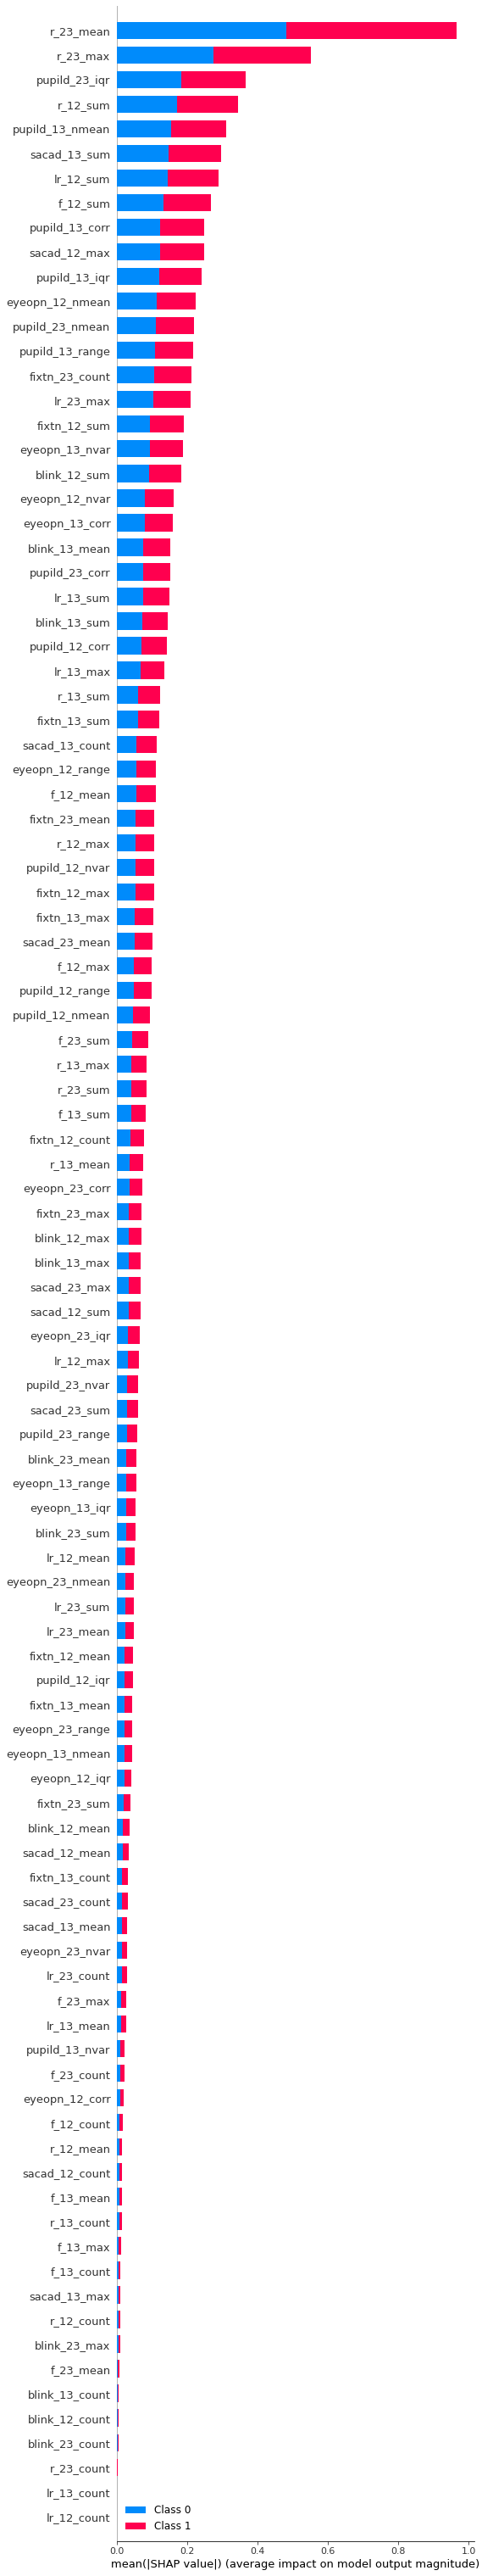

In [42]:
import shap
explainer = shap.TreeExplainer(lgb)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values,x_train,max_display=102)

In [43]:
confusion_matrix_lgb = confusion_matrix(y_test,y_pred_lgb)
confusion_matrix_lgb

array([[ 89,  33],
       [ 20, 105]], dtype=int64)

# CatBoost

In [44]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(learning_rate=0.01,
                        n_estimators=1200,
                        max_depth=10,
                        loss_function='Logloss',
                        random_seed=seed,
                        )
cb.fit(x_train,y_train,eval_set=[(x_test,y_test)],verbose_eval=300)


0:	learn: 0.6886057	test: 0.6912000	best: 0.6912000 (0)	total: 450ms	remaining: 8m 59s
300:	learn: 0.1629976	test: 0.4717049	best: 0.4717049 (300)	total: 1m 13s	remaining: 3m 40s
600:	learn: 0.0725969	test: 0.4264842	best: 0.4264842 (600)	total: 2m 26s	remaining: 2m 26s
900:	learn: 0.0391642	test: 0.4113403	best: 0.4113403 (900)	total: 3m 40s	remaining: 1m 13s
1199:	learn: 0.0243444	test: 0.4062116	best: 0.4061194 (1170)	total: 4m 54s	remaining: 0us

bestTest = 0.4061193573
bestIteration = 1170

Shrink model to first 1171 iterations.


In [45]:
y_pred_cb = cb.predict(x_test)
cb_acc = accuracy_score(y_test,y_pred_cb)
print(f'CatBoost正确率：{cb_acc}')

CatBoost正确率：0.8016194331983806


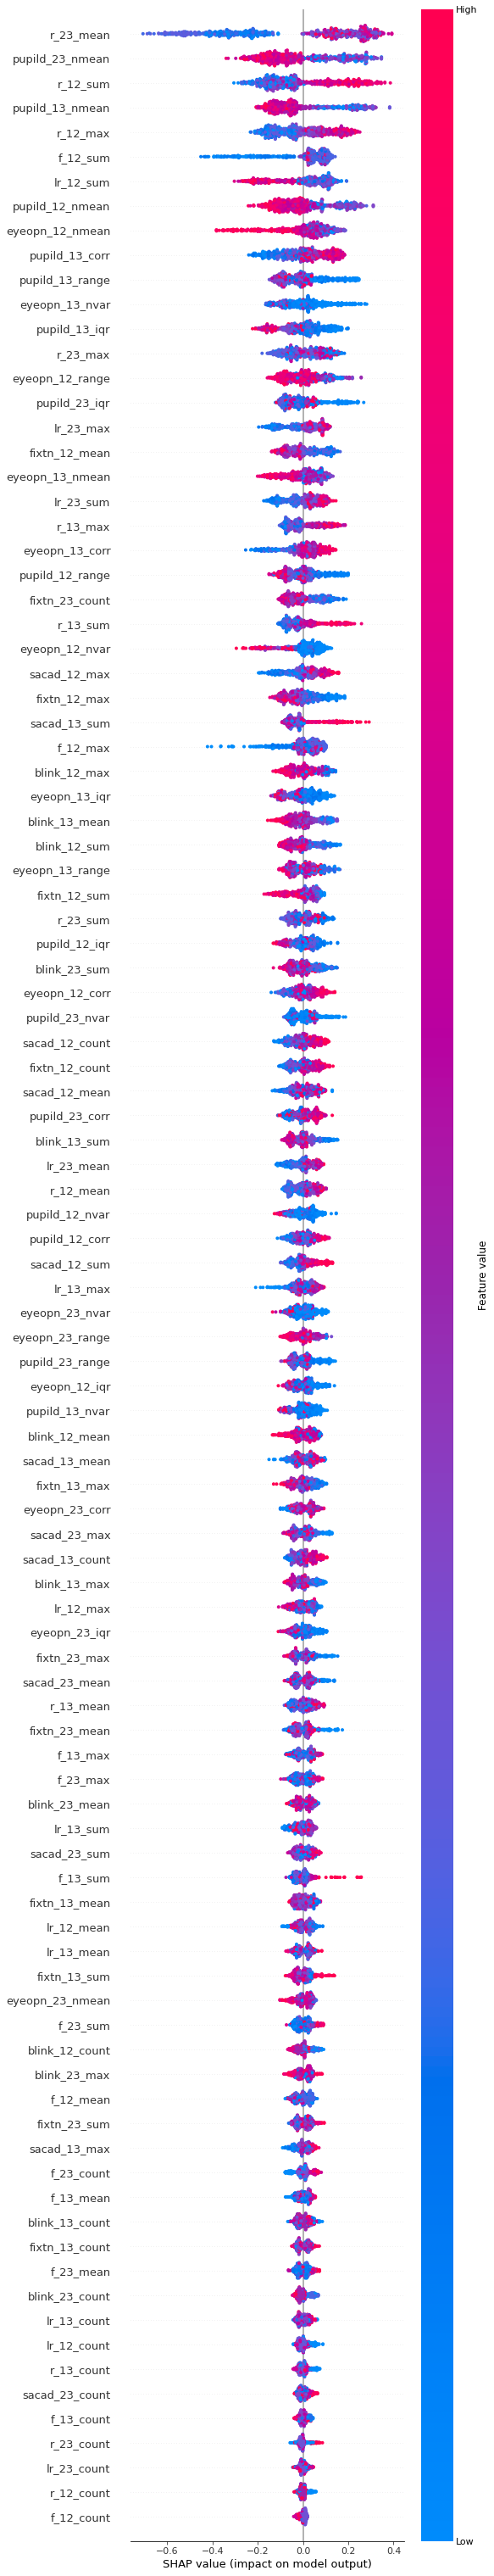

In [46]:
import shap
explainer = shap.TreeExplainer(cb)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values,x_train,max_display=102)

In [47]:
confusion_matrix_cb = confusion_matrix(y_test,y_pred_cb)
confusion_matrix_cb

array([[ 96,  26],
       [ 23, 102]], dtype=int64)

# Logistic Regression

In [48]:
#TODO: 调参
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
lr_acc = accuracy_score(y_test,y_pred_lr)
print(f'逻辑回归正确率:{lr_acc}')

逻辑回归正确率:0.6761133603238867


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [49]:
confusion_matrix_lr = confusion_matrix(y_test,y_pred_lr)
confusion_matrix_lr

array([[82, 40],
       [40, 85]], dtype=int64)

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(
    n_estimators=76,
    max_depth=19,
    max_features=13,
    random_state=seed,
)
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)
rfc_acc = accuracy_score(y_pred_rfc,y_test)
print(f'随机森林正确率:{rfc_acc}')

随机森林正确率:0.8178137651821862


In [51]:
confusion_matrix_rfc = confusion_matrix(y_pred_rfc,y_test)
confusion_matrix_rfc

array([[ 99,  22],
       [ 23, 103]], dtype=int64)

# Support Vector Machine

In [52]:
#TODO: 调参
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)
svm_acc = accuracy_score(y_test,y_pred_svm)
print(f'SVM正确率:{svm_acc}')

SVM正确率:0.6437246963562753


In [53]:
confusion_matrix_svm = confusion_matrix(y_pred_svm,y_test)
confusion_matrix_svm

array([[81, 47],
       [41, 78]], dtype=int64)

# Naive Bayes

In [54]:
# TODO: 调参
from sklearn.naive_bayes import BernoulliNB # 伯努利假定输入数据为二分类数据
nb = BernoulliNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
nb_acc = accuracy_score(y_test,y_pred_nb)
print(f'朴素贝叶斯正确率:{nb_acc}')

朴素贝叶斯正确率:0.5991902834008097


In [55]:
confusion_matrix_nb = confusion_matrix(y_test,y_pred_nb)
confusion_matrix_nb

array([[78, 44],
       [55, 70]], dtype=int64)

# K Nearest Neighbours

In [56]:
# TODO: 调参
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(x_train, y_train) 
y_pred_knn = knn.predict(x_test)
knn_acc = accuracy_score(y_test,y_pred_knn)
print(f'K近邻正确率:{knn_acc}')

K近邻正确率:0.6558704453441295


In [57]:
confusion_matrix_knn = confusion_matrix(y_test,y_pred_knn)
confusion_matrix_knn

array([[77, 45],
       [40, 85]], dtype=int64)

# Multi-layer Perceptron

In [58]:
# TODO: 输出训练中的test acc
# TODO: 调参数num_hidden_layers, num_epoch

num_hidden_layers = 500
num_epoch = 200

In [59]:
import torch
from torch import nn

import warnings
warnings.filterwarnings("ignore")

x_train_tensor = torch.Tensor(x_train.values)
y_train_tensor = torch.Tensor(y_train.values).to(torch.long)

y_train_tensor = torch.nn.functional.one_hot(y_train_tensor, num_classes=2)
y_train_tensor = torch.Tensor(y_train_tensor).to(torch.float)
x_test_tensor = torch.tensor(x_test.values).to(torch.float)

In [60]:
loss = nn.CrossEntropyLoss()
torch.seed = 3407
net = nn.Sequential(
        nn.Linear(102,num_hidden_layers),
        nn.Linear(num_hidden_layers,2),
        nn.Softmax()
        )

optimizer = torch.optim.AdamW(net.parameters(), lr=3e-4)

In [61]:
# Training
for epoch in range(num_epoch):
    y_hat = net(x_train_tensor)
    l = loss(y_hat,y_train_tensor)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % (num_epoch//10) == 0: # cheating LMFAO
        y_pred_mlp = torch.argmax(net(x_test_tensor),dim=-1)
        print(f'accuracy_score={accuracy_score(y_test,y_pred_mlp)} at Epoch No.{epoch+1}') 


accuracy_score=0.5546558704453441 at Epoch No.1
accuracy_score=0.6032388663967612 at Epoch No.21
accuracy_score=0.6356275303643725 at Epoch No.41
accuracy_score=0.6558704453441295 at Epoch No.61
accuracy_score=0.6558704453441295 at Epoch No.81
accuracy_score=0.6639676113360324 at Epoch No.101
accuracy_score=0.6639676113360324 at Epoch No.121
accuracy_score=0.6639676113360324 at Epoch No.141
accuracy_score=0.6639676113360324 at Epoch No.161
accuracy_score=0.6680161943319838 at Epoch No.181


In [62]:
y_pred_mlp = torch.argmax(net(x_test_tensor),dim=-1)
mlp_acc = accuracy_score(y_test,y_pred_mlp)
print(f'多层感知机正确率:{mlp_acc}')

多层感知机正确率:0.6720647773279352


# Ensemble

In [63]:
# TODO: KFold
from sklearn.ensemble import VotingClassifier

# weights = [0.4,0.2,0.4]
weights = torch.tensor([xgb_acc,lgb_acc,cb_acc,lr_acc,rfc_acc,nb_acc,knn_acc]) * 10
# weights
softmax_weights = nn.Softmax()(weights)
print(softmax_weights)

tensor([0.3241, 0.1564, 0.1839, 0.0524, 0.2162, 0.0243, 0.0428],
       dtype=torch.float64)


In [64]:
ensemble = VotingClassifier(estimators=[('xgb',xgb),
                                        ('lgb',lgb), 
                                        ('cat', cb),
                                        ('log_clf', lr),
                                        ('rf', rfc),
                                        # ('svm_clf', svm), SVM不支持voting
                                        ('bnb', nb),
                                        ('knn', knn)
                                        ],
                            weights=softmax_weights,
                            voting='soft',
                            )
ensemble.fit(x_train,y_train)


0:	learn: 0.6886057	total: 270ms	remaining: 5m 23s
1:	learn: 0.6836108	total: 606ms	remaining: 6m 2s
2:	learn: 0.6785589	total: 871ms	remaining: 5m 47s
3:	learn: 0.6748595	total: 1.18s	remaining: 5m 53s
4:	learn: 0.6699353	total: 1.45s	remaining: 5m 46s
5:	learn: 0.6658264	total: 1.77s	remaining: 5m 52s
6:	learn: 0.6614954	total: 2.08s	remaining: 5m 55s
7:	learn: 0.6571569	total: 2.34s	remaining: 5m 48s
8:	learn: 0.6520092	total: 2.65s	remaining: 5m 50s
9:	learn: 0.6480502	total: 2.99s	remaining: 5m 56s
10:	learn: 0.6434477	total: 3.3s	remaining: 5m 57s
11:	learn: 0.6384506	total: 3.62s	remaining: 5m 58s
12:	learn: 0.6346906	total: 3.86s	remaining: 5m 52s
13:	learn: 0.6305677	total: 4.1s	remaining: 5m 47s
14:	learn: 0.6264048	total: 4.41s	remaining: 5m 48s
15:	learn: 0.6221552	total: 4.72s	remaining: 5m 49s
16:	learn: 0.6171831	total: 5s	remaining: 5m 47s
17:	learn: 0.6124289	total: 5.34s	remaining: 5m 50s
18:	learn: 0.6085071	total: 5.58s	remaining: 5m 46s
19:	learn: 0.6047469	total: 

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.07, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_r...
                              <catboost.core.CatBoostClassifier object a

In [65]:
y_pred_final = ensemble.predict(x_test)
final_acc = accuracy_score(y_pred_final,y_test)
final_acc

0.7935222672064778

<Figure size 1200x800 with 0 Axes>

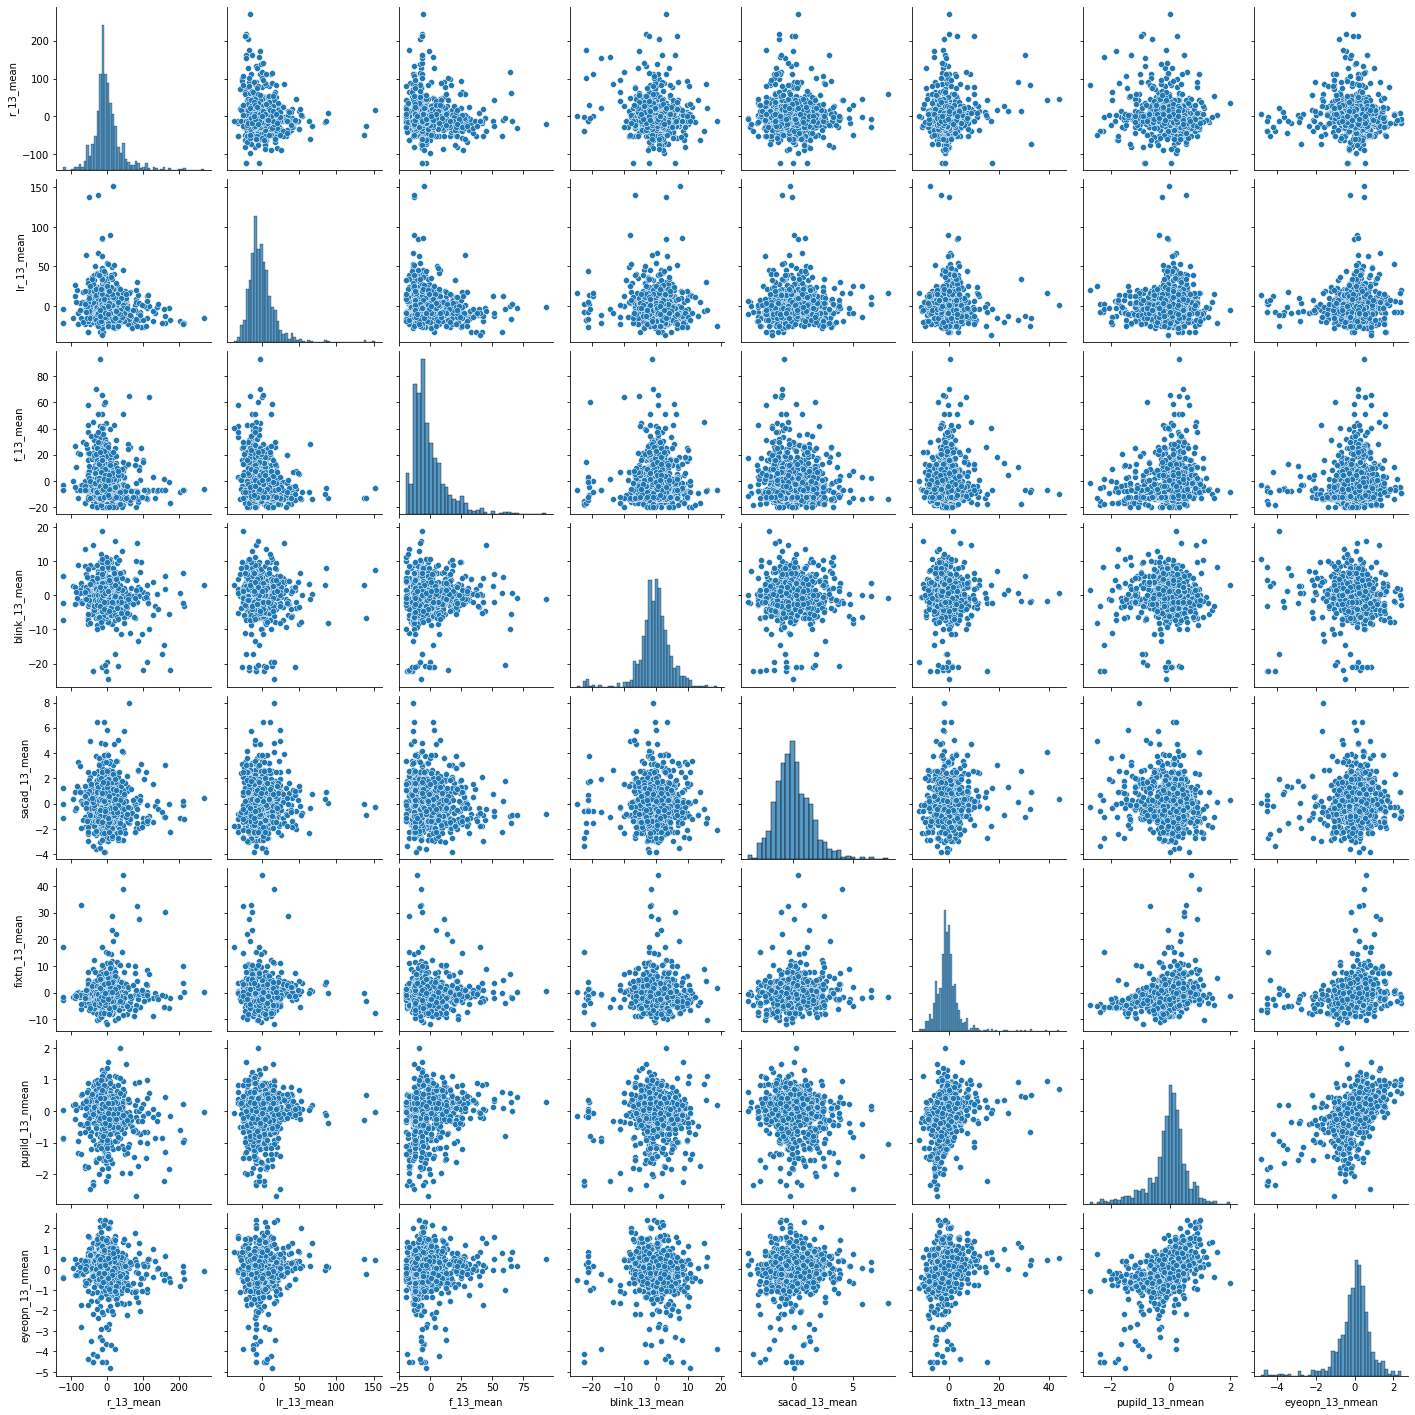

In [66]:
import seaborn
plt.figure(dpi=200)
seaborn.pairplot(data,vars=['r_13_mean','lr_13_mean','f_13_mean','blink_13_mean','sacad_13_mean','fixtn_13_mean','pupild_13_nmean','eyeopn_13_nmean'])
plt.show()